<a href="https://colab.research.google.com/github/shushenka/Capybaras/blob/main/%D0%B2%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving forbes_obrab.csv to forbes_obrab.csv


In [ ]:
data = pd.read_csv('forbes_obrab.csv')
data.head()

,Rank,Name,Country,Sales,Profit,Assets,MV,Industry,Founded,Employees,Share price,Shares availability
0,1,Berkshire Hathaway,United States,276090.0,89800.0,958780.0,741480.0,Diversified Financials,1939,"372,000",318.0,1
1,3,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,400380.0,105360.0,576040.0,2292080.0,Oil & Gas Operations,1933,"68,493",0.0,0
2,4,JPMorgan Chase,United States,124540.0,42120.0,3954690.0,374450.0,Banking,2000,"270,000",128.9,1
3,6,Amazon,United States,469820.0,33360.0,420550.0,1468400.0,E-Commerce,1994,"1,608,000",102.4,1
4,7,Apple,United States,378700.0,100560.0,381190.0,2640320.0,Electronics,1976,"164,000",165.5,1


In [ ]:
data.dtypes

Rank                     int64
Name                    object
Country                 object
Sales                  float64
Profit                 float64
Assets                 float64
MV                     float64
Industry                object
Founded                  int64
Employees               object
Share price            float64
Shares availability      int64
dtype: object

In [ ]:
data.describe()

,Rank,Sales,Profit,Assets,MV,Founded,Share price,Shares availability
count,1605.000000,1605.000000,1605.000000,1.605000e+03,1.605000e+03,1605.000000,1605.000000,1605.000000
mean,969.795639,25012.788162,2544.003053,1.026866e+05,4.111750e+04,1955.943302,51.895888,0.363240
std,567.667815,42745.714865,6357.421668,2.845009e+05,1.288190e+05,54.159342,152.304967,0.481083
min,1.000000,27.000000,-10190.000000,1.660000e+02,1.440000e+02,1472.000000,0.000000,0.000000
25%,480.000000,5940.000000,606.800000,1.522000e+04,8.460000e+03,1925.000000,0.000000,0.000000
50%,951.000000,12960.000000,1090.000000,3.244000e+04,1.814000e+04,1972.000000,0.000000,0.000000
75%,1450.000000,25180.000000,2310.000000,7.695000e+04,3.635000e+04,1997.000000,54.700000,1.000000
max,2000.000000,572750.000000,105360.000000,4.229900e+06,2.640320e+06,2022.000000,2629.600000,1.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)

In [ ]:
data.groupby('Industry')['Name'].count().sort_values(ascending = False) #кол-во компаний в каждой индустрии

Industry
Banking                      173
Diversified Financials       105
Insurance                     89
Materials                     85
Construction                  84
                            ... 
Beverages                      1
Auto Repair & Maintenance      1
Appliances                     1
Home Improvement               1
Alcoholic Beverages            1
Name: Name, Length: 65, dtype: int64

In [ ]:
data.groupby('Country')['Name'].count().sort_values(ascending = False) #кол-во компаний по странам

Country
United States           514
China                   232
Japan                   172
Canada                   54
United Kingdom           53
South Korea              53
Germany                  46
France                   46
India                    44
Switzerland              33
Sweden                   27
Taiwan                   27
Australia                26
Italy                    22
Netherlands              20
Ireland                  17
Hong Kong                17
Brazil                   15
Spain                    15
South Africa             12
Russia                   11
Denmark                  10
Israel                   10
Mexico                    9
Austria                   9
Finland                   9
Thailand                  8
Norway                    8
Poland                    7
Turkey                    7
Belgium                   7
Chile                     6
Malaysia                  6
Saudi Arabia              6
United Arab Emirates      5
Philippines 

In [ ]:
s15 = 1400

In [ ]:
comp_15 = data[(data['Founded'] > s15) & (data['Founded'] < s15+100)]['Name'].count() #компании основанные в 15 веке
comp_16 = data[(data['Founded'] > s15+100) & (data['Founded'] < s15+200)]['Name'].count() #16 век
comp_17 = data[(data['Founded'] > s15+200) & (data['Founded'] < s15+300)]['Name'].count()
comp_18 = data[(data['Founded'] > s15+300) & (data['Founded'] < s15+400)]['Name'].count()
comp_19 = data[(data['Founded'] > s15+400) & (data['Founded'] < s15+500)]['Name'].count()
comp_20 = data[(data['Founded'] > s15+500) & (data['Founded'] < s15+600)]['Name'].count()
comp_21 = data[(data['Founded'] > s15+600) & (data['Founded'] < s15+700)]['Name'].count() #21 век

In [ ]:
comp_founded = [comp_15, comp_16, comp_17, comp_18, comp_19, comp_20, comp_21]
list_founded = list(range(15,22))

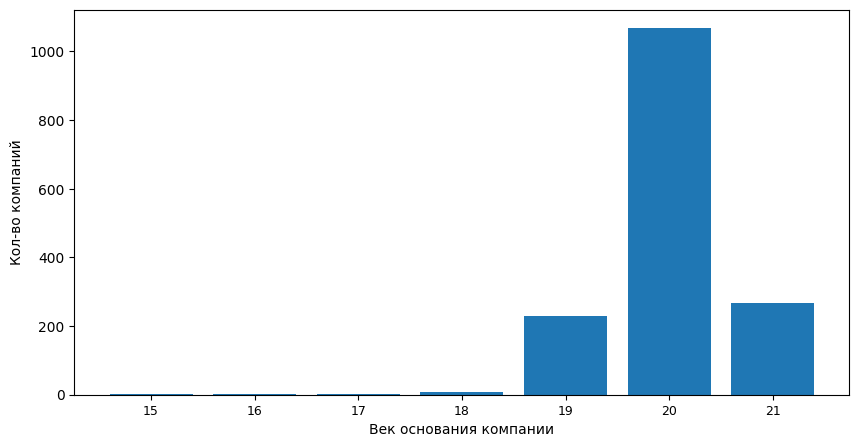

In [ ]:
plt.bar(list_founded, comp_founded)

plt.xticks(list_founded, size=9)
plt.ylabel('Кол-во компаний', fontsize=10)
plt.xlabel('Век основания компании');

Text(0.5, 1.0, 'Распределение компаний по 10 самым крупным идустриям')

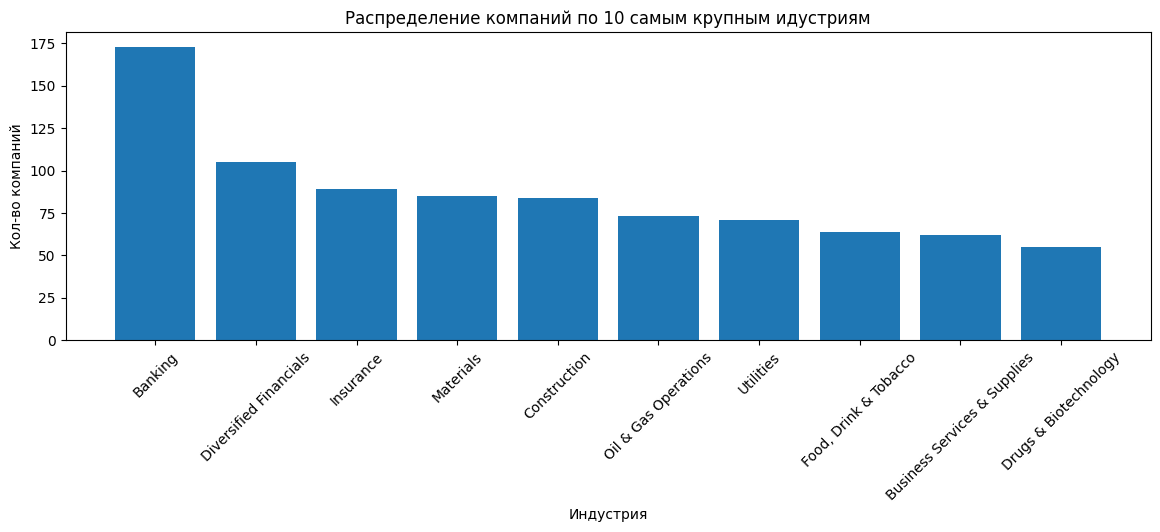

In [ ]:
a = data.groupby('Industry').count().sort_values(by='Rank',ascending=False).head(10)
plt.figure(figsize=(14, 4))
plt.bar(a.index, a['Rank'])
plt.xticks(rotation=45)
plt.xlabel('Индустрия')
plt.ylabel('Кол-во компаний')
plt.title('Распределение компаний по 10 самым крупным идустриям')

Text(0.5, 1.0, 'Распределение прибыли по идустриям')

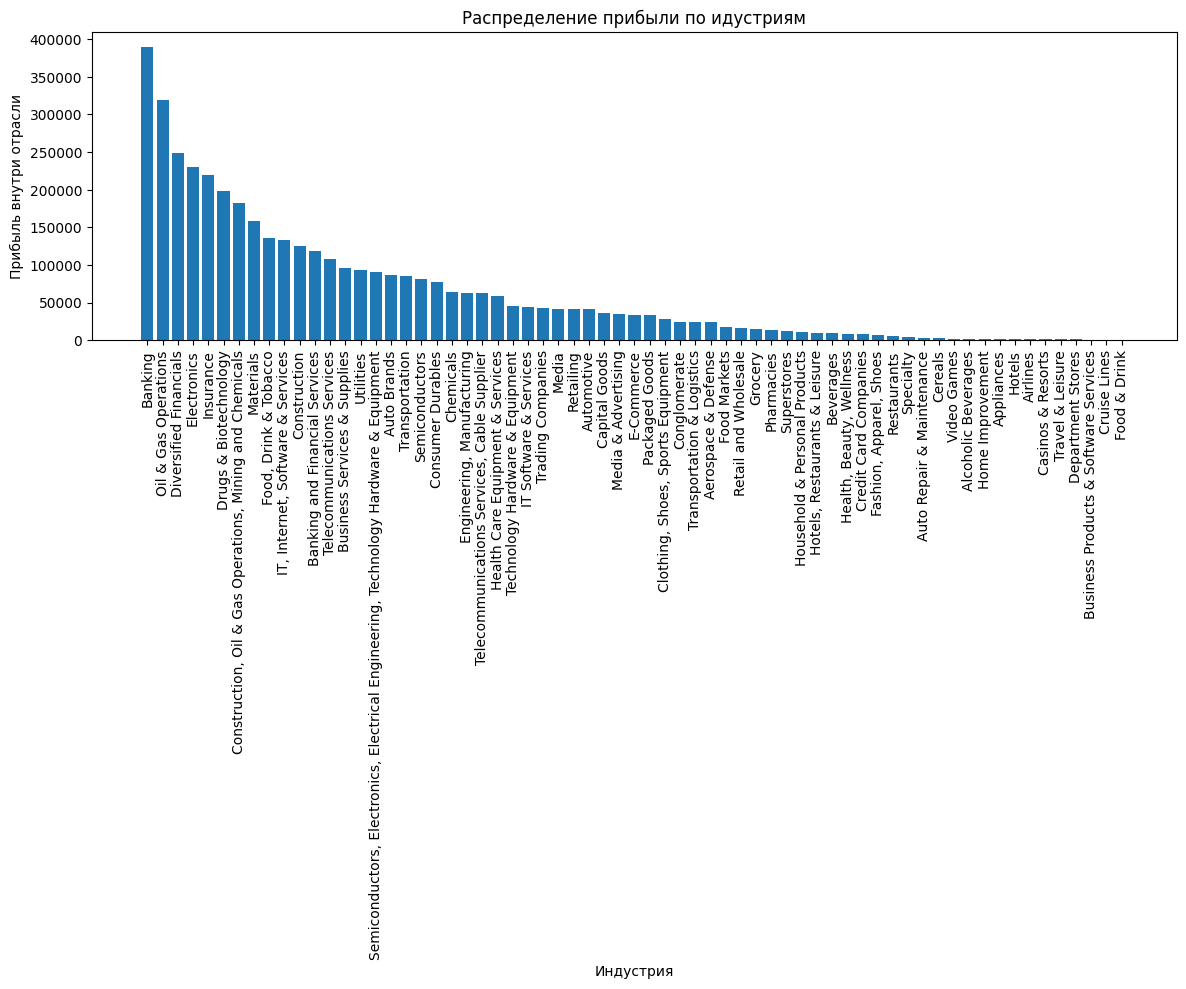

In [ ]:
b = data.groupby('Industry')['Profit'].sum().sort_values(ascending = False).reset_index(name='sum')
plt.figure(figsize=(14, 4))
plt.bar(b['Industry'], b['sum'])
plt.xticks(rotation=90)
plt.xlabel('Индустрия')
plt.ylabel('Прибыль внутри отрасли')
plt.title('Распределение прибыли по идустриям')

In [ ]:
data[data['Shares availability']==1]

,Rank,Name,Country,Sales,Profit,Assets,MV,Industry,Founded,Employees,Share price,Shares availability
0,1,Berkshire Hathaway,United States,276090.0,89800.0,958780.0,741480.0,Diversified Financials,1939,"372,000",318.0,1
2,4,JPMorgan Chase,United States,124540.0,42120.0,3954690.0,374450.0,Banking,2000,"270,000",128.9,1
3,6,Amazon,United States,469820.0,33360.0,420550.0,1468400.0,E-Commerce,1994,"1,608,000",102.4,1
4,7,Apple,United States,378700.0,100560.0,381190.0,2640320.0,Electronics,1976,"164,000",165.5,1
5,9,Bank of America,United States,96830.0,31000.0,3238220.0,303100.0,Banking,1904,"166,400",28.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1590,1982,Group 1 Automotive,United States,13710.0,533.6,5750.0,2860.0,Retailing,1995,"13,711",223.4,1
1591,1983,Unity Software,United States,1110.0,-532.6,4840.0,22410.0,IT Software & Services,2004,"5,245",29.4,1
1595,1986,Twilio,United States,2840.0,-949.9,13000.0,22290.0,IT Software & Services,2008,"7,867",59.8,1
1599,1992,Match Group,United States,2980.0,277.7,5060.0,22040.0,IT Software & Services,2009,"2,540",35.7,1


In [ ]:
data["Company age"]=2023 - data['Founded']
data.head()

,Rank,Name,Country,Sales,Profit,Assets,MV,Industry,Founded,Employees,Share price,Shares availability,Company age
0,1,Berkshire Hathaway,United States,276090.0,89800.0,958780.0,741480.0,Diversified Financials,1939,"372,000",318.0,1,84
1,3,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,400380.0,105360.0,576040.0,2292080.0,Oil & Gas Operations,1933,"68,493",0.0,0,90
2,4,JPMorgan Chase,United States,124540.0,42120.0,3954690.0,374450.0,Banking,2000,"270,000",128.9,1,23
3,6,Amazon,United States,469820.0,33360.0,420550.0,1468400.0,E-Commerce,1994,"1,608,000",102.4,1,29
4,7,Apple,United States,378700.0,100560.0,381190.0,2640320.0,Electronics,1976,"164,000",165.5,1,47


<Axes: title={'center': 'Company age'}>

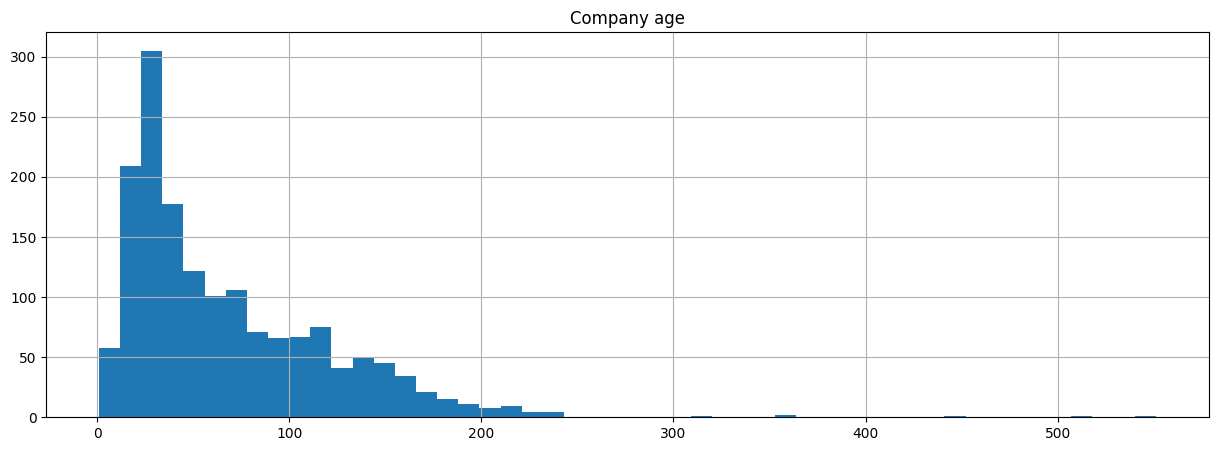

In [ ]:
plt.rcParams["figure.figsize"] = (15, 5)
plt.title("Company age")
data["Company age"].hist(bins=50)

In [ ]:
data.groupby(['Industry', 'Country'])[['Profit', 'Share price'] ].agg(['mean', 'count', 'median'])

Profit                 \
                                                 mean count   median   
Industry            Country                                            
Aerospace & Defense China                  773.650000     2   773.65   
                    France                 670.400000     2   670.40   
                    Ireland                985.400000     1   985.40   
                    Mexico                 800.100000     1   800.10   
                    Norway                 432.700000     1   432.70   
...                                               ...   ...      ...   
Utilities           United Arab Emirates   953.100000     2   953.10   
                    United Kingdom        2876.666667     3  3040.00   
                    United States          997.386667    30  1270.00   
Video Games         Ireland               -571.900000     1  -571.90   
                    United States         2700.000000     1  2700.00   

                                         Share price                
                                                mean count  median  
Industry            Country                                         
Aerospace & Defense China                     144.70     2  144.70  
                    France                      0.00     2    0.00  
                    Ireland                   753.70     1  753.70  
                    Mexico                     68.30     1   68.30  
                    Norway                      0.00     1    0.00  
...                                              ...   ...     ...  
Utilities           United Arab Emirates       31.00     2   31.00  
                    United Kingdom              8.50     3    0.00  
                    United States              57.79    30   62.55  
Video Games         Ireland                   128.20     1  128.20  
                    United States              85.50     1   85.50  

[539 rows x 6 columns]

In [ ]:
colnames = ['Sales',	'Profit',	'Assets',	'MV',	'Employees', 'Share price']
p = data[colnames].corr(method='pearson')

<ipython-input-20-6c2ed852b5ca>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  p = data[colnames].corr(method='pearson')


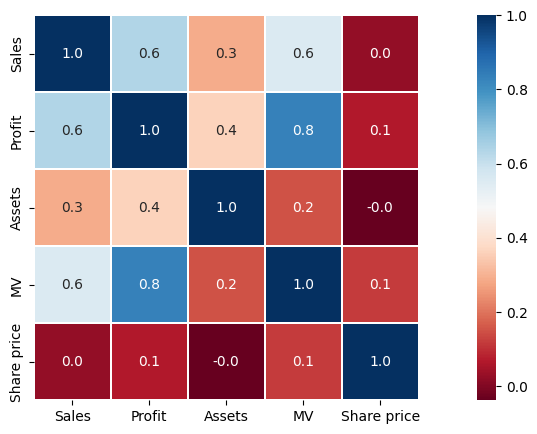

In [ ]:
import seaborn as sns
sns.heatmap(p, 
            square=True, annot=True, fmt=".1f", 
            linewidths=0.1, cmap="RdBu");

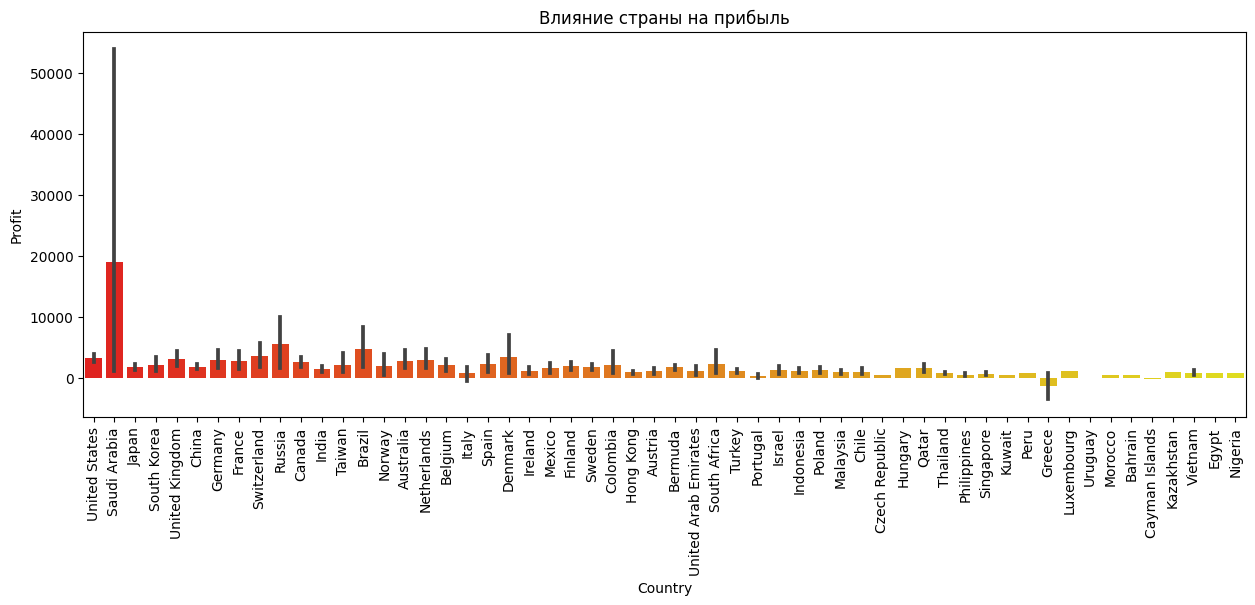

In [ ]:
sns.barplot(x="Country", y="Profit", data=data, palette="autumn")
plt.title("Влияние страны на прибыль")
plt.xticks(rotation=90)
plt.show()

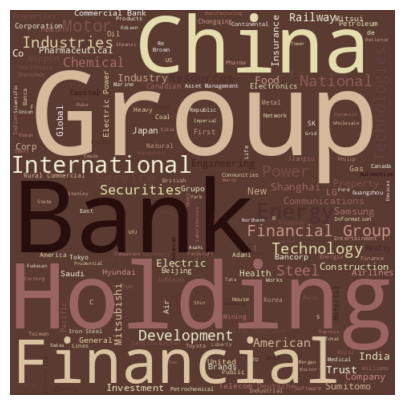

In [ ]:
from wordcloud import WordCloud

text=(' '.join(data['Name'].tolist()))

wordcloud = WordCloud(width=480, height=480, margin=0, colormap='pink_r', background_color='#5A3A31').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

**Вывод:** Наиболее часто в названиях крупнейших мировых компаний встречаются слова Group, Financial, Bank, Holding, International и что необычно - China

In [ ]:
data.Employees = data.Employees.apply(lambda x: int(x.replace(',', '')))

In [ ]:
industries = (data.groupby('Industry')['MV'].sum()).sort_values(ascending=False)[:5].index
# топ-5 индустрий по суммарному MV

In [ ]:
# топ-5 стран по MV за 2022 год
countries = (data.groupby('Country')['MV'].sum()).sort_values(ascending=False)[:5].index

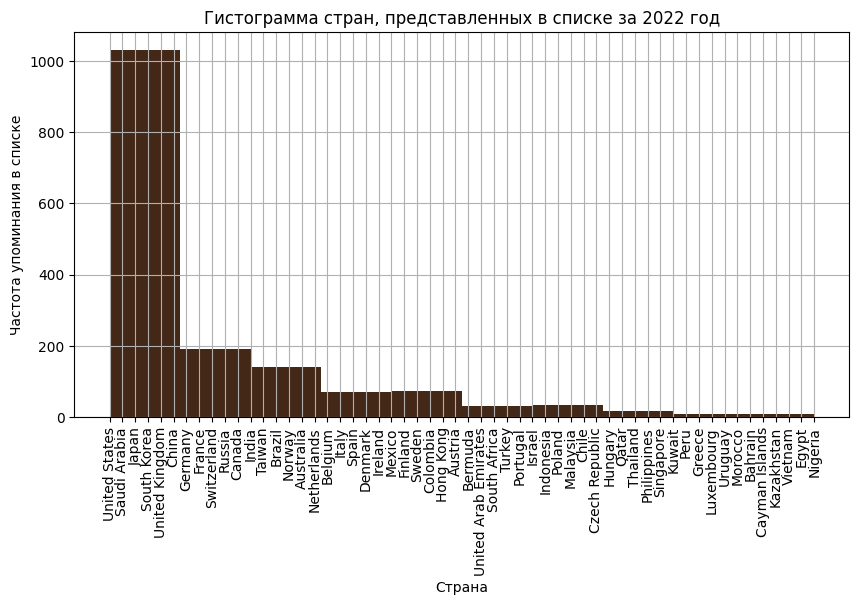

In [ ]:
plt.figure(figsize = (10,5))
data['Country'].hist(color='#432818');
plt.xticks(rotation='vertical');
plt.xlabel("Страна")
plt.ylabel("Частота упоминания в списке")

plt.title("Гистограмма стран, представленных в списке за 2022 год");

Вывод: Мы видим, что чаще всего в списке Forbes 2000 встречаются компании из США, Саудовской Аравии, Японии, Южной Кореи, Великобритании и Китая

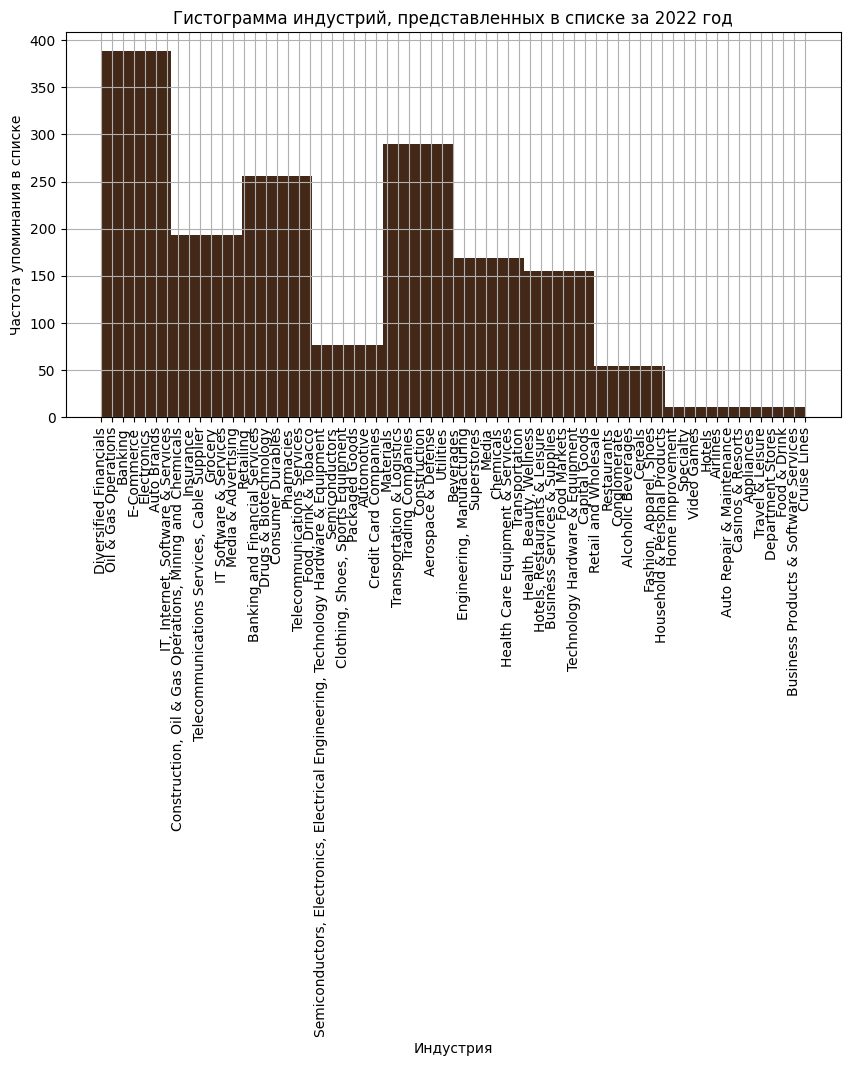

In [ ]:
plt.figure(figsize = (10,5))
data['Industry'].hist(color = '#432818');
plt.xticks(rotation='vertical');
plt.xlabel("Индустрия")
plt.ylabel("Частота упоминания в списке")
plt.title("Гистограмма индустрий, представленных в списке за 2022 год");

**Вывод:** Таким образом, наболее часто среди крупнейших компаний в мире в 2022 году встречаются компании, специализирующиеся на диверсифицированных финансах, операциях с нефтью и газом, банкинге, электронной коммерции, электронике, автомобилях и ИТ.

Далее в основном будем работать с топ-5 стран по MV и топ-5 индустрий по MV

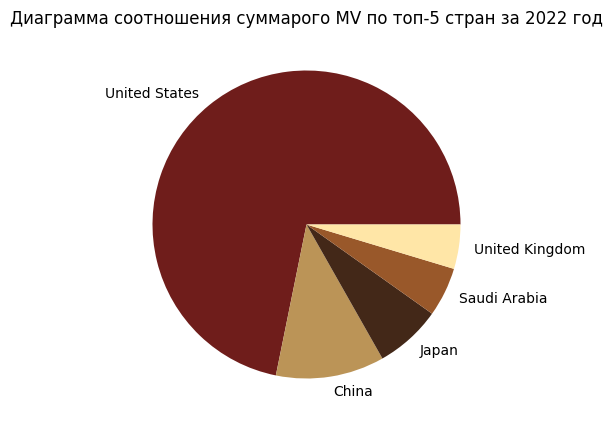

In [ ]:
y = (data.groupby('Country')['MV'].sum()).sort_values(ascending=False)[:5]
mylabels = (data.groupby('Country')['MV'].sum()).sort_values(ascending=False).index[:5]
mycolors = ['#6F1D1B', '#BB9457', '#432818', '#99582A', '#FFE6A7']

plt.pie(y, labels = mylabels, colors = mycolors)
plt.title("Диаграмма соотношения суммарного MV по топ-5 стран за 2022 год");
plt.show() 

**Вывод:** Среди топ-5 стран по списку Форбс 2022 США занимает наибольшую часть рынка

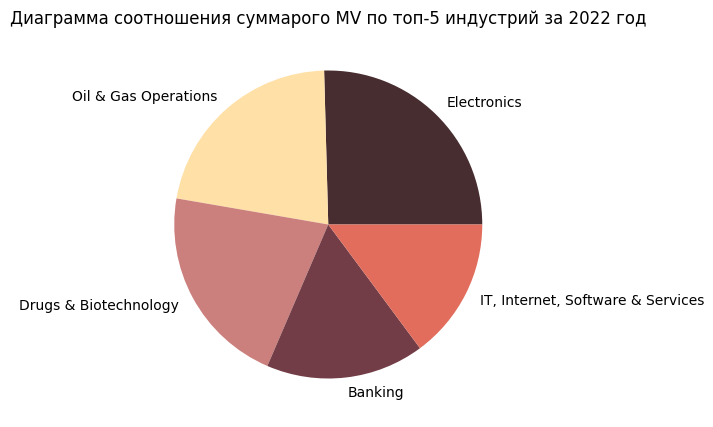

In [ ]:
y = (data.groupby('Industry')['MV'].sum()).sort_values(ascending=False)[:5]
mylabels = (data.groupby('Industry')['MV'].sum()).sort_values(ascending=False).index[:5]
mycolors = ['#472D30', '#FFE1A8', '#CB807D', '#723D46', '#E26D5C']

plt.pie(y, labels = mylabels, colors = mycolors)
plt.title("Диаграмма соотношения суммарного MV по топ-5 индустрий за 2022 год");
plt.show() 

**Вывод:** Топ-5 индустрий по списку Форбс 2022 занимают примерно одинаковую долю рынка.

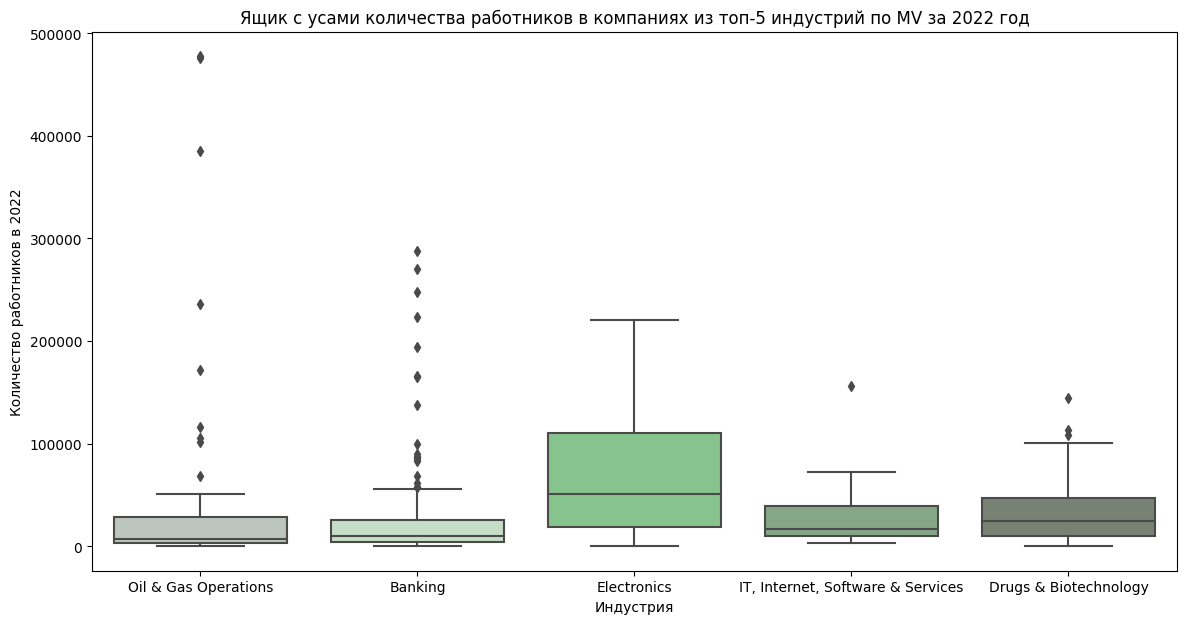

In [ ]:
plt.figure(figsize = (14,7))
sns.boxplot(x='Industry', 
               y='Employees', 
               data=data[['Industry', 'Employees']][ (data['Industry']).isin(industries)], 
               palette = ['#BAC7BE', '#C2E1C2', '#7DCD85', '#80AB82', '#778472'])
plt.title("Ящик с усами количества работников в компаниях из топ-5 индустрий по MV за 2022 год");
plt.xlabel('Индустрия')
plt.ylabel('Количество работников в 2022');

**Вывод:** В среднем больше всего сотрудников в компаниях из сферы Electronics, также в этой сфере наибольший разброс. В сферах Oil&Gas Operations и Banking больше всего выбросов (нетипичных компаний) количества сотрудников по компаниям.

In [ ]:
df_pivot = data.pivot_table(index='Country', columns='Industry', values='MV', aggfunc='count')
df_pivot = df_pivot[(df_pivot.index).isin(countries)]
ind = list(industries)
df_pivot[ind]

Industry,Electronics,Oil & Gas Operations,Drugs & Biotechnology,Banking,"IT, Internet, Software & Services"
Country,,,,,
China,NaN,6.0,4.0,30.0,1.0
Japan,2.0,6.0,10.0,29.0,NaN
Saudi Arabia,NaN,3.0,NaN,2.0,NaN
United Kingdom,NaN,NaN,2.0,5.0,NaN
United States,4.0,18.0,25.0,30.0,14.0


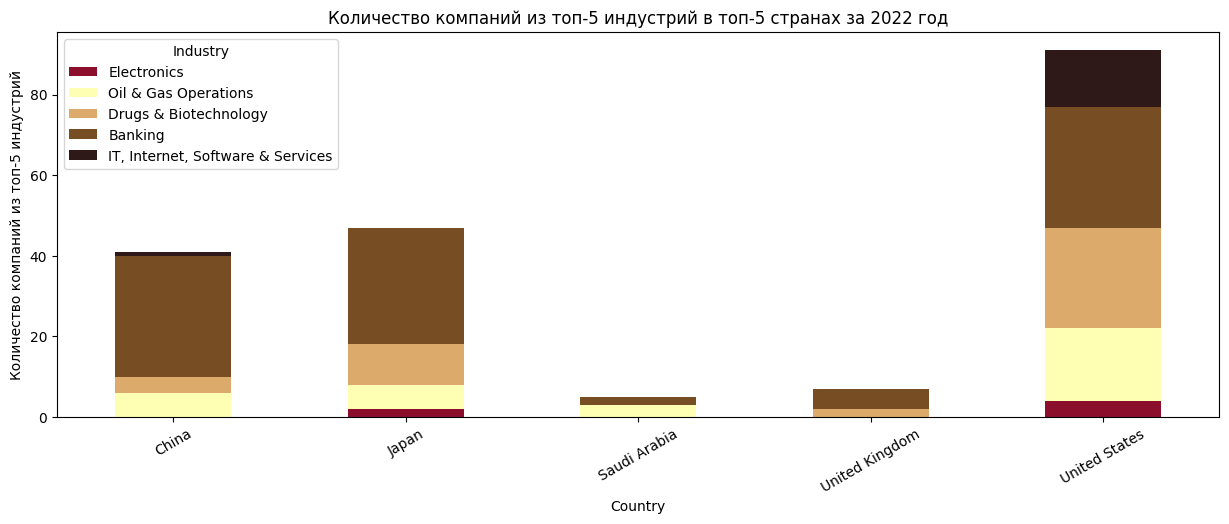

In [ ]:
colors = ['#8C0E2D', '#FFFFB3', '#DCAB6B', '#774E24', '#2E1818']
df_pivot[ind].plot(kind='bar', stacked=True, color=colors)
plt.xticks(rotation=30);
plt.ylabel("Количество компаний из топ-5 индустрий")
plt.title("Количество компаний из топ-5 индустрий в топ-5 странах за 2022 год");

**Вывод:** В Китае, США и Японии преобладают банки. В США так же активно развиты биотехнологии и фармацевтика и операции с нефтью и газом.

In [ ]:
uploaded = files.upload()

Saving Forbes-2017.xlsx to Forbes-2017.xlsx


In [ ]:
uploaded = files.upload()

Saving Forbes-2018.xlsx to Forbes-2018.xlsx


In [ ]:
uploaded = files.upload()

Saving Forbes-2019.xlsx to Forbes-2019.xlsx


In [ ]:
uploaded = files.upload()

Saving Forbes-2020.xlsx to Forbes-2020.xlsx


In [ ]:
uploaded = files.upload()

Saving Forbes-2021.xlsx to Forbes-2021.xlsx


In [ ]:
uploaded = files.upload()

Saving forbes2000 (1).csv to forbes2000 (1).csv


In [ ]:
df_forbes2000_2017 = pd.read_excel('Forbes-2017.xlsx')
df_forbes2000_2017['Market Value']*=1000
df_forbes2000_2017.head()

,Rank,Name,Country,Sales,Profit,Assets,Market Value,Year
0,1,ICBC,China,151.381,41.9837,3473.238,229805.0,2017
1,2,China Construction Bank,China,134.242,34.9814,3016.578,200458.0,2017
2,3,Berkshire Hathaway,United States,222.935,24.0740,620.854,409908.0,2017
3,4,JPMorgan Chase,United States,102.494,24.2310,2512.986,306616.0,2017
4,5,Wells Fargo,United States,97.573,21.9380,1943.443,274385.0,2017


In [ ]:
df_forbes2000_2018 = pd.read_excel('Forbes-2018.xlsx')
df_forbes2000_2018['Market Value']*=1000
df_forbes2000_2018.head()

,Rank,Name,Country,Sales,Profit,Assets,Market Value,Year
0,1,ICBC,China,165.338,43.6694,4210.927,311014.0,2018
1,2,China Construction Bank,China,143.202,37.2031,3631.583,261166.0,2018
2,3,JPMorgan Chase,United States,118.180,26.4960,2609.785,387668.0,2018
3,4,Berkshire Hathaway,United States,235.165,39.7420,702.651,491888.0,2018
4,5,Agricultural Bank of China,China,129.345,29.6387,3439.314,184125.0,2018


In [ ]:
df_forbes2000_2019 = pd.read_excel('Forbes-2019.xlsx')
df_forbes2000_2019['Market Value']*=1000
df_forbes2000_2019.head()

,Rank,Name,Country,Sales,Profit,Assets,Market Value,Year
0,1,ICBC,China,175.874,45.223,4034.482,305057.0,2019
1,2,JPMorgan Chase,United States,132.912,32.738,2737.188,368502.0,2019
2,3,China Construction Bank,China,150.313,38.841,3382.422,224988.0,2019
3,4,Agricultural Bank of China,China,137.456,30.894,3293.105,197045.0,2019
4,5,Bank of America,United States,111.904,28.540,2377.164,287339.0,2019


In [ ]:
# в 2020 и 2021 году обработка просто как в парсинге 2022
df_forbes2000_2020 = pd.read_excel('Forbes-2020.xlsx')

df_forbes2000_2020['Sales'] = df_forbes2000_2020['Sales'].apply(lambda x: x[1:])
df_forbes2000_2020['Profit'] = df_forbes2000_2020['Profit'].apply(lambda x: x[1:])
df_forbes2000_2020['Assets'] = df_forbes2000_2020['Assets'].apply(lambda x: x[1:])
df_forbes2000_2020['Market Value'] = df_forbes2000_2020['Market Value'].apply(lambda x: x[1:])

df_forbes2000_2020['sales MB'] = df_forbes2000_2020['Sales'].apply(lambda x: 1 if x[-1] == 'M' else 1000 if x[-1] == 'B' else None)
df_forbes2000_2020['assets MB'] = df_forbes2000_2020['Assets'].apply(lambda x: 1 if x[-1] == 'M' else 1000 if x[-1] == 'B' else None)
df_forbes2000_2020['profit MB'] = df_forbes2000_2020['Profit'].apply(lambda x: 1 if x[-1] == 'M' else 1000 if x[-1] == 'B' else None)
df_forbes2000_2020['MV MB'] = df_forbes2000_2020['Market Value'].apply(lambda x: 1 if x[-1] == 'M' else 1000 if x[-1] == 'B' else None)

df_forbes2000_2020['Sales'] = df_forbes2000_2020['Sales'].apply(lambda x: float(x[:-1]))
df_forbes2000_2020['Profit'] = df_forbes2000_2020['Profit'].apply(lambda x: float(x[:-1]))
df_forbes2000_2020['Assets'] = df_forbes2000_2020['Assets'].apply(lambda x: float(x.replace(',', '')[:-1]))
df_forbes2000_2020['Market Value'] = df_forbes2000_2020['Market Value'].apply(lambda x: float(x.replace(',', '')[:-1]))


df_forbes2000_2020['Sales']=df_forbes2000_2020['Sales']*df_forbes2000_2020['sales MB']
df_forbes2000_2020['Assets']=df_forbes2000_2020['Assets']*df_forbes2000_2020['assets MB']
df_forbes2000_2020['Profit']=df_forbes2000_2020['Profit']*df_forbes2000_2020['profit MB']
df_forbes2000_2020['Market Value']=df_forbes2000_2020['Market Value']*df_forbes2000_2020['MV MB']

df_forbes2000_2020 = df_forbes2000_2020.drop(columns = ['sales MB','assets MB','profit MB','MV MB'])
df_forbes2000_2020.head()

,Rank,Name,Country,Sales,Profit,Assets,Market Value,Year
0,1,ICBC,China,177200.0,45300.0,4322500.0,242300.0,2020
1,2,China Construction Bank,China,162100.0,38900.0,3822000.0,203800.0,2020
2,3,JPMorgan Chase,United States,142900.0,30000.0,3139400.0,291700.0,2020
3,4,Berkshire Hathaway,United States,254600.0,81400.0,817700.0,455400.0,2020
4,5,Agricultural Bank of China,China,148700.0,30900.0,3697500.0,147200.0,2020


In [ ]:
df_forbes2000_2021 = pd.read_excel('Forbes-2021.xlsx')
df_forbes2000_2021.Assets[df_forbes2000_2021[['Assets']].isnull().any(1)] = '$0 B'

df_forbes2000_2021['Sales'] = df_forbes2000_2021['Sales'].apply(lambda x: x[1:])
df_forbes2000_2021['Assets'] = df_forbes2000_2021['Assets'].apply(lambda x: x[1:])
df_forbes2000_2021['Profit'] = df_forbes2000_2021['Profit'].apply(lambda x: x[1:])
df_forbes2000_2021['Market Value'] = df_forbes2000_2021['Market Value'].apply(lambda x: x[1:])

df_forbes2000_2021['sales MB'] = df_forbes2000_2021['Sales'].apply(lambda x: 1 if x[-1] == 'M' else 1000 if x[-1] == 'B' else None)
df_forbes2000_2021['assets MB'] = df_forbes2000_2021['Assets'].apply(lambda x: 1 if x[-1] == 'M' else 1000 if x[-1] == 'B' else None)
df_forbes2000_2021['profit MB'] = df_forbes2000_2021['Profit'].apply(lambda x: 1 if x[-1] == 'M' else 1000 if x[-1] == 'B' else None)
df_forbes2000_2021['MV MB'] = df_forbes2000_2021['Market Value'].apply(lambda x: 1 if x[-1] == 'M' else 1000 if x[-1] == 'B' else None)

df_forbes2000_2021['Sales'] = df_forbes2000_2021['Sales'].apply(lambda x: float(x[:-1]))
df_forbes2000_2021['Profit'] = df_forbes2000_2021['Profit'].apply(lambda x: float(x[:-1]))
df_forbes2000_2021['Assets'] = df_forbes2000_2021['Assets'].apply(lambda x: float(x.replace(',', '')[:-1]))
df_forbes2000_2021['Market Value'] = df_forbes2000_2021['Market Value'].apply(lambda x: float(x.replace(',', '')[:-1]))


df_forbes2000_2021['Sales']=df_forbes2000_2021['Sales']*df_forbes2000_2021['sales MB']
df_forbes2000_2021['Assets']=df_forbes2000_2021['Assets']*df_forbes2000_2021['assets MB']
df_forbes2000_2021['Profit']=df_forbes2000_2021['Profit']*df_forbes2000_2021['profit MB']
df_forbes2000_2021['Market Value']=df_forbes2000_2021['Market Value']*df_forbes2000_2021['MV MB']

df_forbes2000_2021 = df_forbes2000_2021.drop(columns = ['sales MB','profit MB','MV MB', 'assets MB'])
df_forbes2000_2021.head()

<ipython-input-18-da897d259ca9>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df_forbes2000_2021.Assets[df_forbes2000_2021[['Assets']].isnull().any(1)] = '$0 B'
<ipython-input-18-da897d259ca9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_forbes2000_2021.Assets[df_forbes2000_2021[['Assets']].isnull().any(1)] = '$0 B'


,Rank,Name,Country,Sales,Profit,Assets,Market Value,Year
0,1.0,ICBC,China,190500.0,45800.0,4914700.0,249500.0,2021
1,2.0,JPMorgan Chase,United States,136200.0,40400.0,3689300.0,464800.0,2021
2,3.0,Berkshire Hathaway,United States,245500.0,42500.0,873700.0,624400.0,2021
3,4.0,China Construction Bank,China,173500.0,39300.0,4301700.0,210400.0,2021
4,5.0,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,229700.0,49300.0,510300.0,1897200.0,2021


In [ ]:
df_forbes2000_2022 = pd.read_csv('forbes2000 (1).csv')
df_forbes2000_2022 = df_forbes2000_2022[['rank','name','country', 'MV']]
df_forbes2000_2022['MV'] = df_forbes2000_2022['MV'].apply(lambda x: x[1:])
df_forbes2000_2022['MV MB'] = df_forbes2000_2022['MV'].apply(lambda x: 1 if x[-1] == 'M' else 1000 if x[-1] == 'B' else None)
df_forbes2000_2022['MV'] = df_forbes2000_2022['MV'].apply(lambda x: float(x.replace(',', '')[:-1]))
df_forbes2000_2022['MV']=df_forbes2000_2022['MV']*df_forbes2000_2022['MV MB']
df_forbes2000_2022 = df_forbes2000_2022.drop(columns = ['MV MB'])
df_forbes2000_2022.head()

,rank,name,country,MV
0,1.0,Berkshire Hathaway,United States,741480.0
1,2.0,ICBC,China,214430.0
2,3.0,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,2292080.0
3,4.0,JPMorgan Chase,United States,374450.0
4,5.0,China Construction Bank,China,181320.0


In [ ]:
# топ-5 стран по MV за 2022 год
countries = (df_forbes2000_2022.groupby('country')['MV'].sum()).sort_values(ascending=False)[:5].index

In [ ]:
# данные по полученным странам за 2017 год
df_top_2017 = (df_forbes2000_2017.groupby('Country')['Market Value'].sum()).to_frame()[(df_forbes2000_2017.groupby('Country')['Market Value'].sum()).to_frame().index.isin (countries)]

In [ ]:
# данные по полученным странам за 2018 год
df_top_2018 = (df_forbes2000_2018.groupby('Country')['Market Value'].sum()).to_frame()[(df_forbes2000_2018.groupby('Country')['Market Value'].sum()).to_frame().index.isin (countries)]

In [ ]:
# данные по полученным странам за 2019 год
df_top_2019 = (df_forbes2000_2019.groupby('Country')['Market Value'].sum()).to_frame()[(df_forbes2000_2019.groupby('Country')['Market Value'].sum()).to_frame().index.isin (countries)]

In [ ]:
# данные по полученным странам за 2020 год
df_top_2020 = (df_forbes2000_2020.groupby('Country')['Market Value'].sum()).to_frame()[(df_forbes2000_2020.groupby('Country')['Market Value'].sum()).to_frame().index.isin (countries)]

In [ ]:
# данные по полученным странам за 2021 год
df_top_2021 = (df_forbes2000_2021.groupby('Country')['Market Value'].sum()).to_frame()[(df_forbes2000_2021.groupby('Country')['Market Value'].sum()).to_frame().index.isin (countries)]

In [ ]:
# данные по полученным странам за 2022 год
df_top_2022 = (df_forbes2000_2022.groupby('country')['MV'].sum()).sort_values(ascending=False)[:5].to_frame()

In [ ]:
df_new = df_top_2017 # агргированная таблица динамики MV топ-5 стран
df_new['MV 2018'] = df_top_2018['Market Value']
df_new['MV 2019'] = df_top_2019['Market Value']
df_new['MV 2020'] = df_top_2020['Market Value']
df_new['MV 2021'] = df_top_2021['Market Value']
df_new['MV 2022'] = df_top_2022['MV']
df_new = df_new.T
df_new.reset_index( inplace= True )
df_new

Country,index,China,Japan,Saudi Arabia,United Kingdom,United States
0,Market Value,4649178.0,3243379.0,294517.0,2123653.0,21545972.0
1,MV 2018,6289226.0,3835176.0,336622.0,2421348.0,24516497.0
2,MV 2019,6503439.0,3400181.0,416135.0,2220974.0,25974702.0
3,MV 2020,5979200.0,3176497.0,1970800.0,1731729.0,25911617.0
4,MV 2021,9080249.0,4295301.0,2307500.0,2104300.0,39430252.0
5,MV 2022,6509653.0,3397698.0,2666540.0,2492120.0,36592272.0


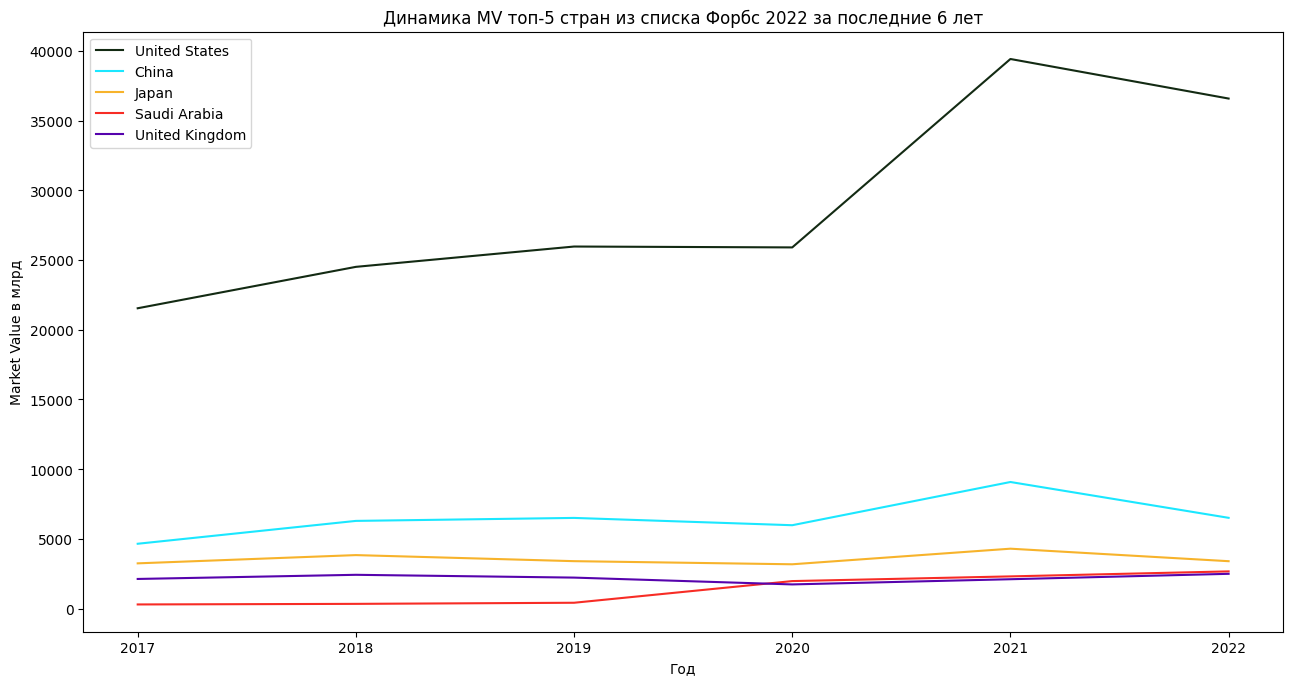

In [ ]:
colors = ['#132A13', '#1BE7FF', '#F7B32B', '#F72C25', '#5603AD']
years =[2017,2018,2019,2020,2021,2022]
fig = plt.figure(figsize = (12, 6))
axes = fig.add_axes([0,0,1,1])
plt.plot(years,df_new[countries[0]]/1000, color=colors[0])
plt.plot(years,df_new[countries[1]]/1000, color=colors[1])
plt.plot(years,df_new[countries[2]]/1000, color=colors[2])
plt.plot(years,df_new[countries[3]]/1000, color=colors[3])
plt.plot(years,df_new[countries[4]]/1000, color=colors[4])


plt.title("Динамика MV топ-5 стран из списка Форбс 2022 за последние 6 лет")
plt.xlabel("Год")
plt.ylabel("Market Value в млрд")
axes.legend(countries, loc = 0) ;

**Вывод:** Из графика видно, что суммарный Market Value почти всех стран из топ-5, кроме Великобритании, рос. При этом суммарный MV компаний из США значительно выше, чем у других стран.